# APIとは

API（Application Programming Interface（アプリケーション・プログラミング・インタフェース））は、ソフトウェアの一部機能を共有する仕組みを指す。「機能を公開しているソフトウェア」と「その機能を使いたいソフトウェア」をつなげる窓口のようなもの。

# NewsAPIで日本語のニュースを取得する

In [46]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


In [47]:
from newsapi import NewsApiClient
from pprint import pprint

In [48]:
#テキストマイニングで使用
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
print("API-KEYを入力してください（クォーテーション等は不要）。")
API_KEY = input()

API-KEYを入力してください（クォーテーション等は不要）。
key


## タイトルで取得

In [50]:
# Init
newsapi = NewsApiClient(api_key=API_KEY) #各自のもの

# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='知床',language=None,country='jp')
#'ja'がないのでNoneとする #日本国内だから'jp'とする

In [51]:
pprint(top_headlines)

{'articles': [{'author': '読売新聞オンライン',
               'content': '298053502022/05/07 22:27:002022/05/08 '
                          '00:09:522022/05/08 '
                          '00:09:52https://www.yomiuri.co.jp/media/2022/05/20220507-OYT1I50145-T.jpg?type=thumbnail',
               'description': '北海道・知床半島沖で乗客乗員２６人を乗せた観光船「ＫＡＺＵ\u3000'
                              'Ｉ（カズワン）」が沈没した事故で、海上保安庁が海中の捜索を委託した民間作業船「新日丸」が７日、網走港（北海道網走市）に到着し、事故現場海域に向かった。８日以降',
               'publishedAt': '2022-05-07T15:09:52Z',
               'source': {'id': None, 'name': 'Yomiuri.co.jp'},
               'title': '日本サルヴェージの無人潜水機が到着、飽和潜水の事前調査へ…乗客家族には社長が初の補償説明 - '
                        '読売新聞オンライン',
               'url': 'https://www.yomiuri.co.jp/national/20220507-OYT1T50201/',
               'urlToImage': 'https://www.yomiuri.co.jp/media/2022/05/20220507-OYT1I50145-T.jpg?type=ogp'}],
 'status': 'ok',
 'totalResults': 1}


titleとdesciptionのみ

In [60]:
top = top_headlines['articles']
last1 = len(top)

list1 = []
for i in range(0,last1):
    article = top[i]
    a = article['title']
    b = article['description']
    list1.append(a) #リストにtitle内容を追加
    list1.append(b) #リストにdescription内容を追加
x = ''.join(list1)  #リストを文字列にキャスト
print(len(x))

165


## 本文で取得

In [53]:
# Init
newsapi = NewsApiClient(api_key=API_KEY)

word = '知床'
# /v2/everything
all_articles = newsapi.get_everything(q=word,language=None)

In [54]:
pprint(all_articles)

{'articles': [{'author': 'dqnplus',
               'content': '1 2022/04/24() 17:48:41.82 ID:hq5rOuFg9',
               'description': '1 名前：香味焙煎 ★：2022/04/24(日) 17:48:41.82 '
                              'ID:hq5rOuFg9\n'
                              '\n'
                              '\n'
                              '\n'
                              '\n'
                              '知床観光船事故を受け、地元の4社でつくる「知床小型観光船協議会」は24日、4月28日～5月8日の運航自粛を決めたと明らかにした。\n'
                              '\n'
                              'https://nordot.app/890877730326315008',
               'publishedAt': '2022-04-24T11:19:58Z',
               'source': {'id': None, 'name': 'Livedoor.jp'},
               'title': '知床の小型観光船４社、大型連休中の運航自粛',
               'url': 'http://blog.livedoor.jp/dqnplus/archives/2015790.html',
               'urlToImage': 'https://livedoor.blogimg.jp/dqnplus/imgs/b/6/b63765e5-s.jpg'},
              {'author': 'dqnplus',
               'content': '3: 2022/04/27() 16:50:56.39 ID:a

titleとdesciptionのみ

In [61]:
all_ = all_articles['articles']
last2 = len(all_)

list2 = []
for i in range(0,last2):
    article = all_[i]
    c = article['title']
    d = article['description']
    list2.append(c) #リストにtitle内容を追加
    list2.append(d) #リストにdescription内容を追加
y = ''.join(list2)  #リストを文字列にキャスト
print(len(y))

3160


## テキストマイニング

In [62]:
#テキストファイルにする
file = open(word + '.txt', mode='w')
file.write(x+y)
file.close()

#内容を確認する
z = open(word+'.txt',mode='r').read()
print(z)

日本サルヴェージの無人潜水機が到着、飽和潜水の事前調査へ…乗客家族には社長が初の補償説明 - 読売新聞オンライン北海道・知床半島沖で乗客乗員２６人を乗せた観光船「ＫＡＺＵ　Ｉ（カズワン）」が沈没した事故で、海上保安庁が海中の捜索を委託した民間作業船「新日丸」が７日、網走港（北海道網走市）に到着し、事故現場海域に向かった。８日以降知床の小型観光船４社、大型連休中の運航自粛1 名前：香味焙煎 ★：2022/04/24(日) 17:48:41.82 ID:hq5rOuFg9




知床観光船事故を受け、地元の4社でつくる「知床小型観光船協議会」は24日、4月28日～5月8日の運航自粛を決めたと明らかにした。

https://nordot.app/890877730326315008【知床観光船事故】運航会社社長、冒頭で土下座 「お騒がせしました！」1 名前：どどん ★：2022/04/27(水) 16:56:53.60 ID:p0jkBysC9
北海道斜里町の知床半島沖で26人が乗った観光船KAZU1（カズワン）が遭難した事故から5日目。観光船の運航会社の社長が4月27日午後、事故後初めて記者会見を開きました。

知床遊覧船の桂田精一社長は、27日午後4...知床横断道路が春迎え半年ぶり開通　観光船事故が影北海道の知床半島で、冬期間通行止めだった国道334号の「知床横断道路」が28日、約半年ぶりに開通した。知床に春の観光シーズンの到来を告げるイベントだが、多数の死者・行方不明者を出す観光船事故が直前に…【知床観光船事故】死亡した福島の男性（28）はリオン・ドール取締役だった1 名前：デデンネ ★：2022/04/28(木) 12:01:55.69 ID:xNjyR1Nt9
北海道・知床の観光船遭難事故で、福島県などでスーパーを展開するリオン・ドールコーポレーション（会津若松市）は２８日朝、亡くなった同市の小池駿介さん（２８）が同社の取締役であることを明らかにした。...知床岬までの観光船は「ヒグマに出会える確率94%」　複数社が運航知床は2005年に世界自然遺産に登録され、雄大な自然が多くの観光客をひきつけてきた。そもそもどんな場所なのか。　知床半島は北海道東部のオホーツク海に突き出た半島で、先端に知床岬がある。半島の中央部に…知床・観光船事故、運航会社の社長を事情聴

In [58]:
read_file = word+'.txt'
create_file = word+'.png'
font = "/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc"

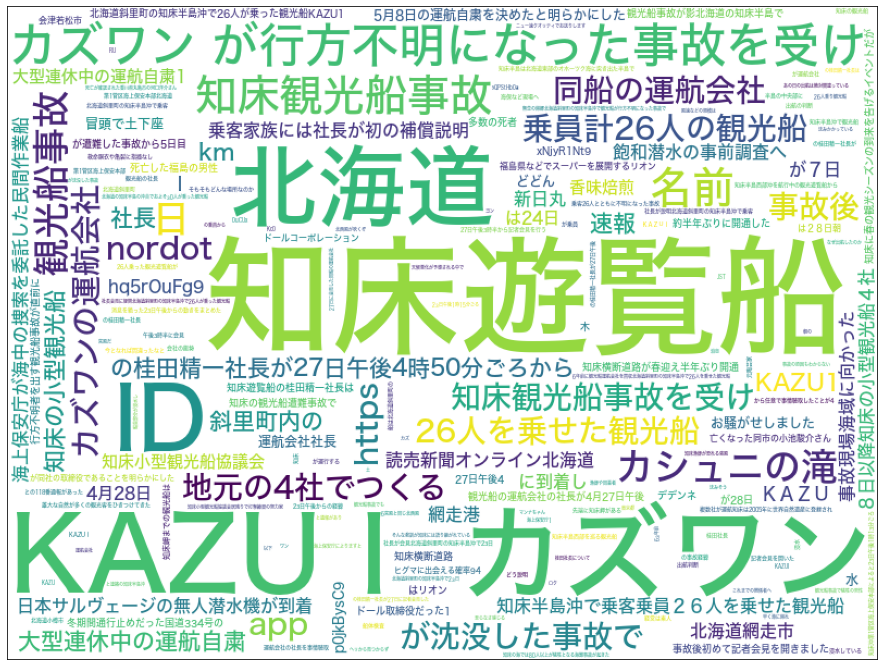

In [59]:
with open(read_file,encoding='utf-8')as _f:
    text = _f.read()
    
wordcloud = WordCloud(background_color="white",font_path=font,width=800,height=600).generate(text)
wordcloud.to_file(create_file)

im = Image.open(create_file)
plt.figure(figsize=(16,12))
plt.imshow(im)

plt.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
plt.tick_params(bottom=False,left=False,right=False,top=False)

plt.show()